In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', rc={'figure.facecolor':'white'})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [177]:
age = np.random.normal(80,7,1000)
age= age.astype(int)
# age

In [178]:
df=pd.DataFrame({"age":age})

In [179]:
# df['age'].value_counts()

About 3% of people between the ages of 65–74 have dementia, 19% between 75 and 84, and nearly half of those over 85 years of age.[22] In 2013 dementia resulted in about 1.7 million deaths, up from 0.8 million in 1990.[23] As more people are living longer, dementia is becoming more common.[21]

In [180]:
# disease_id = [np.random.choice(range(10), p=[0.01,0.1,0.05,0.19,0.3,0.1,0.1,0.05,0.08,0.02]) for i in range(1000)]
# disease_id

In [181]:
def dementia(record):
    if record['age']<74:
        label = np.random.choice([1,0], p=[0.03,0.97])
    elif 84>record['age']>=75:
        label = np.random.choice([1,0], p=[0.19,0.81])
    else:
        label = np.random.choice([1,0], p=[0.5,0.5])
    return label

In [182]:
df['has_dementia']=df.apply(dementia,axis=1)

In [183]:
gender = [np.random.choice([0,1], p=[0.5,0.5]) for i in range(1000)]
df['gender']=gender

In [184]:
df

,age,has_dementia,gender
0,86,1,0
1,78,0,0
2,64,0,1
3,89,1,1
4,89,0,1
...,...,...,...
995,66,0,1
996,74,1,1
997,86,0,0
998,79,0,0


In [185]:
def mobility(record):
    if record['age']<70 and record['gender']==1:
        label = np.random.choice([1,0], p=[0.125,0.875])
    elif record['age']<70 and record['gender']==0:
        label = np.random.choice([1,0], p=[0.2,0.8])
    elif 80>record['age']>=70 and record['gender']==1:
        label = np.random.choice([1,0], p=[0.25,0.75])
    elif 80>record['age']>=70 and record['gender']==0:
        label = np.random.choice([1,0], p=[0.38,0.62])
    elif record['age']>=80 and record['gender']==1:
        label = np.random.choice([1,0], p=[0.52,0.48])
    else:
        label = np.random.choice([1,0], p=[0.7,0.3])
    return label

In [186]:
df['has_mobility']=df.apply(mobility,axis=1)

In [187]:
df['has_family']=[np.random.choice([1,0], p=[0.50,0.50]) for i in range(1000)]

In [188]:
df['has_family'].value_counts()

0    521
1    479
Name: has_family, dtype: int64

In [189]:
df['city']=[np.random.choice(['Tel-Aviv','Jerusalem','Haifa','Rishon-Letzion','Beer Sheva','Eshdod','Petach-Tikva','Natania'], p=[0.19,0.20,0.16,0.1,0.08,0.08,0.1,0.09]) for i in range(1000)]

In [190]:
def has_spouse(record):
    if record['age']<70 and record['gender']==1:
        label = np.random.choice([1,0], p=[0.9,0.1])
    elif record['age']<70 and record['gender']==0:
        label = np.random.choice([1,0], p=[0.8,0.2])
    elif 80>record['age']>=70 and record['gender']==1:
        label = np.random.choice([1,0], p=[0.8,0.2])
    elif 80>record['age']>=70 and record['gender']==0:
        label = np.random.choice([1,0], p=[0.7,0.3])
    elif record['age']>=80 and record['gender']==1:
        label = np.random.choice([1,0], p=[0.65,0.35])
    else:
        label = np.random.choice([1,0], p=[0.5,0.5])
    return label

In [191]:
df['has_spouse']=df.apply(has_spouse,axis=1)

In [192]:
def using_mobility_device(record):
    if record['age']<70:
        label = np.random.choice([1,0], p=[0.08,0.92])
    elif 74>record['age']>=70 and record['gender']==0:
        label = np.random.choice([1,0], p=[0.09,0.91])
    elif 74>record['age']>=70 and record['gender']==1:
        label = np.random.choice([1,0], p=[0.08,0.92])
    elif 84>record['age']>=75 and record['gender']==0:
        label = np.random.choice([1,0], p=[0.19,0.81])  
    elif 84>record['age']>=75 and record['gender']==1:
        label = np.random.choice([1,0], p=[0.15,0.85]) 
    elif record['age']>=85 and record['gender']==0:
        label = np.random.choice([1,0], p=[0.45,0.55]) 
    else:
        label = np.random.choice([1,0], p=[0.3,0.7]) 
    return label

In [193]:
df['has_mobility_device']=df.apply(using_mobility_device,axis=1)

In [194]:
d={'Tel-Aviv':1,'Jerusalem':2,'Haifa':3,'Rishon-Letzion':4,'Beer Sheva':5,'Eshdod':6,'Petach-Tikva':7,'Natania':8}

In [195]:
df['city']=df['city'].map(d)

In [196]:
df['task']=[np.random.choice(['carry bags','company','housekeeping','pet care','technology','walk']) for i in range(1000)]

In [197]:
d={'carry bags':1,'company':2,'housekeeping':3,'pet care':4,'technology':5,'walk':6}

In [198]:
df['task']=df['task'].map(d)

In [199]:
def duration(record):
    if record['task']==1:
        label = 30+record['has_dementia']*0.06-record['has_mobility']*0.05-record['has_spouse']*0.02
    elif record['task']==2:
        label = 60+record['has_dementia']*0.06-record['has_mobility']*0.05-record['has_spouse']*0.02
    elif record['task']==3:
        label = 120+record['has_dementia']*0.06-record['has_mobility']*0.05-record['has_spouse']*0.02
    elif record['task']==4:
        label = 30+record['has_dementia']*0.06-record['has_mobility']*0.05-record['has_spouse']*0.02
    elif record['task']==5:
        label = 100+record['has_dementia']*0.06-record['has_mobility']*0.05-record['has_spouse']*0.02
    else:
        label = 100+record['has_dementia']*0.06-record['has_mobility']*0.05-record['has_spouse']*0.02
    return label
        

In [200]:
df['duration']=df.apply(duration,axis=1)+np.random.normal(0,5,df.shape[0])

In [201]:
df[df['task']==5]

,age,has_dementia,gender,has_mobility,has_family,city,has_spouse,has_mobility_device,task,duration
0,86,1,0,1,1,5,0,0,5,102.025061
6,78,0,0,0,1,1,1,0,5,97.744420
8,72,0,0,0,0,2,1,0,5,100.871985
12,79,0,1,0,1,5,1,0,5,98.751812
13,85,0,0,1,0,3,1,1,5,105.197525
...,...,...,...,...,...,...,...,...,...,...
958,82,0,1,0,1,5,1,0,5,104.075777
960,82,0,0,1,0,3,1,1,5,92.396043
970,86,0,0,0,0,7,1,1,5,107.295530
985,81,0,0,1,0,2,0,0,5,95.729920


In [202]:
df['city']=df['city'].map({1:'Tel-Aviv',2:'Jerusalem',3:'Haifa',4:'Rishon-Letzion',5:'Beer Sheva',6:'Eshdod',7:'Petach-Tikva',8:'Natania'})
df['task'] = df['task'].map({1:'carry bags',2:'company',3:'housekeeping',4:'pet care',5:'technology',6:'walk'})

In [203]:
df

,age,has_dementia,gender,has_mobility,has_family,city,has_spouse,has_mobility_device,task,duration
0,86,1,0,1,1,5,0,0,5,102.025061
1,78,0,0,0,0,1,1,0,3,129.194626
2,64,0,1,0,0,7,1,1,4,36.985072
3,89,1,1,0,1,8,1,0,1,24.798834
4,89,0,1,0,0,7,0,0,6,92.812001
...,...,...,...,...,...,...,...,...,...,...
995,66,0,1,0,1,3,1,0,2,71.783232
996,74,1,1,0,1,3,1,0,4,30.923900
997,86,0,0,1,0,6,1,1,2,59.543150
998,79,0,0,1,1,2,0,1,4,32.902922


In [204]:
df['city']=df.city.astype('category')
df['task']=df.task.astype('category')
df=pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
age                    1000 non-null int32
has_dementia           1000 non-null int64
gender                 1000 non-null int64
has_mobility           1000 non-null int64
has_family             1000 non-null int64
city                   1000 non-null category
has_spouse             1000 non-null int64
has_mobility_device    1000 non-null int64
task                   1000 non-null category
duration               1000 non-null float64
dtypes: category(2), float64(1), int32(1), int64(6)
memory usage: 61.2 KB


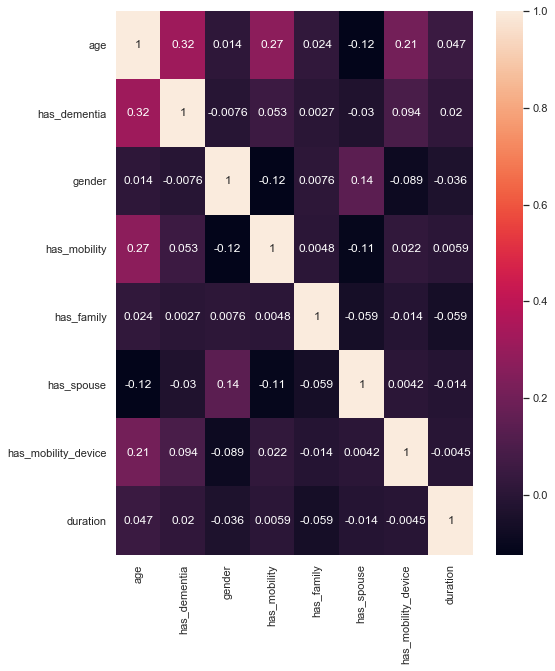

In [205]:
plt.figure(figsize= (8,10))
sns.heatmap(df.corr(), annot=True)

In [206]:
X = df.drop('duration', axis=1)
y=df['duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [207]:
logreg = LinearRegression()

logreg.fit(X_train, y_train)
y_prob = logreg.predict(X_test)

In [208]:
logreg.score(X_test, y_test)

0.16168016320498546